In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import src.atomic_worlds.big_small as bs
import src.atomic_worlds.chain as ch
import src.atomic_worlds.gamblers as ga
import src.utils.param_sweep as ps
import src.utils.transition_matrix as tm
import src.utils.make_environment as make_env
import src.worlds.mdp2d as mdp2d

In [4]:
# Set the number of scales and gammas to use
granularity = 20  # 5, 10, 20

# Set up parameters to search over
probs = np.linspace(0.4, 0.99, granularity)
gammas = np.linspace(0.4, 0.99, granularity)

In [5]:
def convert_to_environment(world: mdp2d.Experiment_2D):
    """Converts a world to an environment."""
    N = world.height
    M = world.width

    R_dict = world.rewards_dict
    R = np.zeros(N * M)
    for key in R_dict:
        R[key] = R_dict[key]

    T = world.mdp.T

    environment = make_env.Environment(
        N=N,
        M=M,
        T_true=T,
        wall_states=[],
        R_sample_mean=None,
        start_state=0,
        n_walls=0,
        R_true=R,
    )

    return environment

In [6]:
def plot_bmap(
    world: mdp2d.Experiment_2D,
    idx_map=None,
    p2idx_override=None,
    tmatrix_func=tm.id_func,
    start_state=0,
    ax=None,
):
    result = ps.run_experiment(
        experiment=world,
        transition_matrix_func=tmatrix_func,
        params=world.params,
        gammas=gammas,
        probs=probs,
        start_state=start_state,
    )

    data = result.data

    if idx_map:
        new_data = np.zeros_like(data)
        for fromm, to in idx_map.items():
            new_data[data == fromm] = to
        data = new_data

    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))

    ps.make_general_strategy_heatmap(
        results=data,
        probs=probs,
        p2idx=p2idx_override,
        title=f"",
        ax=ax,
        gammas=gammas,
        annot=False,
        ax_labels=False,
        num_ticks=5,
    )

## Define BigSmall worlds


In [89]:
big_small_worlds = [
    bs.make_smallbig_experiment(
        height=7,
        width=7,
        big_reward=300,
        small_reward_frac=0.3,
    ),
    bs.make_smallbig_experiment(
        height=7,
        width=7,
        big_reward=300,
        small_reward_frac=0.05,
    ),
    bs.make_smallbig_experiment(
        height=7,
        width=7,
        big_reward=300,
        small_reward_frac=0.005,
    ),
]

big_small_envs = [convert_to_environment(world) for world in big_small_worlds]

In [90]:
p2idx_override_bs = {
    "Close small R": 1,
    "Far large R": 0,
}

idx_map_bs = {0: 1, 1: 0}

[None, None, None]

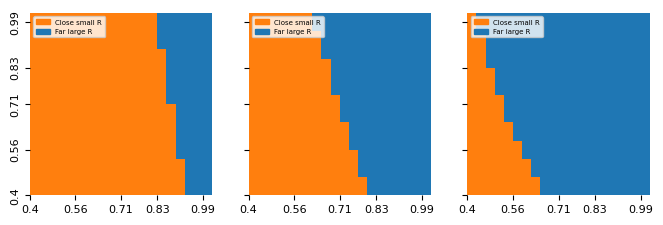

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4), sharex=True, sharey=True)

[
    plot_bmap(
        world=big_small_world,
        idx_map=idx_map_bs,
        p2idx_override=p2idx_override_bs,
        tmatrix_func=tm.id_func,
        ax=ax,
    )
    for big_small_world, ax in zip(big_small_worlds, axs)
]

## Define Gambler's Ruin worlds


In [85]:
gamblers_worlds = [
    ga.make_gamblers_experiment(
        prob=0.8,
        width=5,
        big_r=5,
        small_r=0,
        vary_continuation=False,
    ),
    ga.make_gamblers_experiment(
        prob=0.8,
        width=7,
        big_r=5,
        small_r=0,
        vary_continuation=False,
    ),
    ga.make_gamblers_experiment(
        prob=0.8,
        width=11,
        big_r=5,
        small_r=1,
        vary_continuation=False,
    ),
]

gamblers_envs = [convert_to_environment(world) for world in gamblers_worlds]

In [86]:
p2idx_override_gs = {
    "Continue": 0,
    "Finish": 1,
}
idx_map_gs = {0: 1, 1: 0}


def gamblers_transition(*args, **kwargs):
    return ga.make_gamblers_transition(*args, **kwargs, vary_continuation=False)


def get_start_state(height, width):
    return (height * width) // 2

[None, None, None]

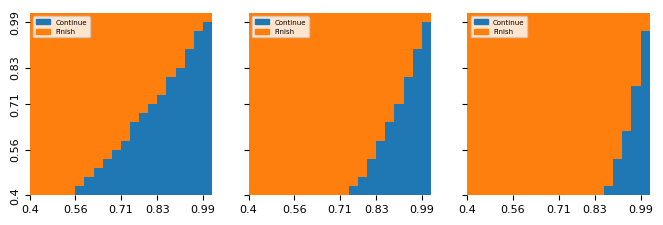

In [87]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4), sharex=True, sharey=True)

[
    plot_bmap(
        world=gamblers_world,
        idx_map=idx_map_gs,
        p2idx_override=p2idx_override_gs,
        tmatrix_func=gamblers_transition,
        start_state=get_start_state(gamblers_world.height, gamblers_world.width),
        ax=ax,
    )
    for gamblers_world, ax in zip(gamblers_worlds, axs)
]

## Chain world


In [54]:
chain_worlds = [
    ch.make_chain_experiment(
        width=7,
        goal_mag=100,
        disengage_reward=-1,
        burden=-1,
    ),
    ch.make_chain_experiment(
        width=7,
        goal_mag=200,
        disengage_reward=-1,
        burden=-1,
    ),
    ch.make_chain_experiment(
        width=14,
        goal_mag=100,
        disengage_reward=-1,
        burden=-1,
    ),
    ch.make_chain_experiment(
        width=14,
        goal_mag=200,
        disengage_reward=-1,
        burden=-1,
    ),
    ch.make_chain_experiment(
        width=21,
        goal_mag=100,
        disengage_reward=-1,
        burden=-1,
    ),
    ch.make_chain_experiment(
        width=21,
        goal_mag=200,
        disengage_reward=-1,
        burden=-1,
    ),
]

chain_envs = [convert_to_environment(world) for world in chain_worlds]

In [55]:
p2idx_override_ch = {
    "Exercise": 0,
    "Disengage": 1,
}
idx_map_ch = {0: 1, 1: 0}

[None, None, None, None, None, None]

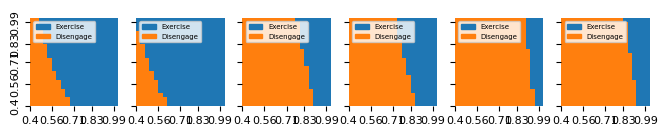

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(8, 4), sharex=True, sharey=True)

[
    plot_bmap(
        world=chain_world,
        idx_map=idx_map_ch,
        p2idx_override=p2idx_override_ch,
        tmatrix_func=ch.make_chain_transition,
        ax=ax,
    )
    for chain_world, ax in zip(chain_worlds, axs)
]